# Climate Data – A hands-on python course
Author: Pedro Herrera Lormendez (pedrolormendez@gmail.com)

## Computing climatologies and anomalies
Climatology,refers to the study and analysis of the climate, typically over extended periods. "A climatology" in a data context, usually means a dataset or analysis representing the average or typical state of the climate system over a specified period. This period is often long enough to smooth out year-to-year variations, leaving only the longer-term, more stable patterns.

* Climatologies are commonly collected and computed over a 30-year period, as recommended by the World Meteorological Organization (WMO). 
* A climatology often involves computing statistical averages of a climate variable over the chose period.
Climatologies are used as a baseline to study current climate conditions, to identify climate anomalies and trends, and in climate modelling and forecasting.
* Climatologies are critical in understanding historical climate patterns, which are essential for predicting future climatic changes and for various applications in agriculture, environmental planning, and disaster managment.

Visualisations:
* [Global temperature distribution](https://climvis.org/content/anim/ltm/globe/t2m_globe_1991-2020_ltm/t2m_globe_1991-2020_ltm.html)
* [Global precipitation rate](https://climvis.org/content/anim/ltm/globe/tp_globe_1991-2020_ltm/tp_globe_1991-2020_ltm.html)
* [P - E](https://climvis.org/content/anim/ltm/globe/pme_globe_1991-2020_ltm/pme_globe_1991-2020_ltm.html)
* [More animations](https://climvis.org/animations.html)

### Computing the seasonal mean temperature over Europe
We will use two datasets from the ERA5 reanalysis of monthly mean temperature and precipitation over Europe. 
* [t2m file](https://drive.google.com/file/d/1-JZirUHXP7sDGIUoFG_h8znRn2rfKT8m/view?usp=sharing)
* [rainfall file](https://drive.google.com/file/d/1ErVv5A0DNhDQKvmVYbUNUAIGysV-p6sd/view?usp=sharing)

In [1]:
# importing the neccessary modules
import sys
import os
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
# Assuming your Jupyter notebook is in the 'notebooks' directory
sys.path.append(os.path.abspath('../help_code'))
import tools

In [2]:
# Reading the file
file_path = '../data/t2m_monthly_era5.nc' # Assuming the file is in the "data" folder
DS = xr.open_dataset(file_path)
DS = tools.convert_and_sort_coords(DS)
DS

<xarray.Dataset>
Dimensions:    (latitude: 201, longitude: 321, time: 996)
Coordinates:
  * longitude  (longitude) float32 -40.0 -39.75 -39.5 -39.25 ... 39.5 39.75 40.0
  * latitude   (latitude) float32 30.0 30.25 30.5 30.75 ... 79.5 79.75 80.0
  * time       (time) datetime64[ns] 1940-01-01 1940-02-01 ... 2022-12-01
Data variables:
    t2m        (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2024-01-11 20:22:15 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [46]:
t2m.time

<xarray.DataArray 'time' (time: 996)>
array(['1940-01-01T00:00:00.000000000', '1940-02-01T00:00:00.000000000',
       '1940-03-01T00:00:00.000000000', ..., '2022-10-01T00:00:00.000000000',
       '2022-11-01T00:00:00.000000000', '2022-12-01T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1940-01-01 1940-02-01 ... 2022-12-01
Attributes:
    long_name:  time

The dimensions of the t2m variable are: ('time', 'latitude', 'longitude')


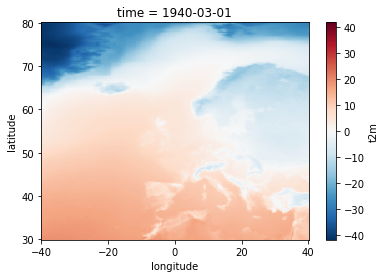

In [68]:
# Reading the temperature variable
t2m = DS.t2m # or DS['t2m']
# To later avoid issues with too short seasons
t2m = t2m.sel(time=slice('1940-03', '2022-11'))
# Converting to ºC
t2m = t2m - 273.15
print(f"The dimensions of the t2m variable are: {t2m.dims}")
# Doing a quick visualization of the data
t2m[0].plot()

The most recent climate period in use corresponds to the 30-year period of 1991 - 2020. Let's compute the climatological seasonal mean (DJF, MAM, JJA, SON) value of tempeature for this period.

In [69]:
# Slicing the data to the 1991-02 - 2020-11 time period
# Use the DataArray.sel() function
t2m_climate_period = t2m.sel(time = slice('1991-03', '2020-11'))
print(f"The dimensions of the t2m_climate_period variable are: {t2m_climate_period.dims}")
print(f"The shape of the t2m_climate_period varible is: {t2m_climate_period.shape}")

The dimensions of the t2m_climate_period variable are: ('time', 'latitude', 'longitude')
The shape of the t2m_climate_period varible is: (357, 201, 321)


In order to compute the mean value of temperature per season we will employ the [DataArray.groupby()](https://docs.xarray.dev/en/stable/generated/xarray.DataArray.groupby.html) function. The 'groupby' function in Xarray is a powerful tool for organizing and summarising data in multi-dimensional arrays. It allows to group a datasets based on time (like months, years, or seasons), geographical locations, or any other dimension or variable in the dataset. After grouping the data, you can apply various functions to each group (like sum, mean, maximum, minimum) which help in summarising the data in each group.

In [70]:
# DataArray.groupby().mean()
t2m_seasonal_mean = t2m_climate_period.groupby('time.season').mean(dim='time')
print(t2m_seasonal_mean)

<xarray.DataArray 't2m' (season: 4, latitude: 201, longitude: 321)>
array([[[ 20.023373  ,  20.008924  ,  19.991676  , ...,  10.416326  ,
          10.390052  ,  10.525078  ],
        [ 19.926989  ,  19.915684  ,  19.899132  , ...,  10.072234  ,
           9.834946  ,   9.912107  ],
        [ 19.830643  ,  19.825262  ,  19.803452  , ...,   9.727584  ,
           9.567096  ,   9.4329605 ],
        ...,
        [-37.109627  , -37.071163  , -37.01748   , ..., -14.638889  ,
         -14.644427  , -14.662494  ],
        [-36.813896  , -36.78203   , -36.75005   , ..., -14.914316  ,
         -14.936536  , -14.958643  ],
        [-36.444347  , -36.43655   , -36.428257  , ..., -15.111059  ,
         -15.13775   , -15.164736  ]],

       [[ 24.37845   ,  24.358276  ,  24.337267  , ...,  31.825033  ,
          32.37736   ,  32.898132  ],
        [ 24.356947  ,  24.334433  ,  24.307587  , ...,  31.612759  ,
          31.73367   ,  32.210632  ],
        [ 24.318802  ,  24.292372  ,  24.271772  , ..

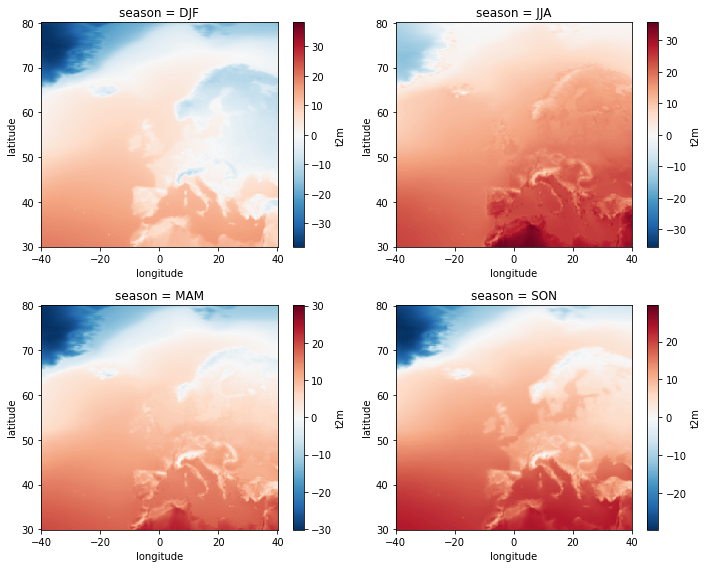

In [71]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Titles for each season
season_titles = ['DJF (Winter)', 'MAM (Spring)', 'JJA (Summer)', 'SON (Autumn)']

# Iterate over each season and plot
for ax, season in zip(axs.ravel(), t2m_seasonal_mean.season.values):
    # Selecting the season
    seasonal_data = t2m_seasonal_mean.sel(season=season)
    
    # Plotting the data
    seasonal_data.plot(ax=ax)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

#### Practice time 💻
<div style="background-color:lightgreen; padding:10px">
    Compute the European mean seasonal temperature .
    <ul>
        <li>Crop to the area of -10 to 35ºE and 35 to 70ºN</li>
        <li>Compute the spatial mean value</li>
        <li>Plot a time series of the seasonal mean value of EU temperature</li>
        <li>Add appropiate axis labels and title</li>
    </ul>
</div>

In [72]:
# Re-aranging "season" dimension to DJF, MAM, JJA, SON
season_order = ['DJF', 'MAM', 'JJA', 'SON']
t2m_seasonal_mean = t2m_seasonal_mean.reindex(season=season_order)
t2m_seasonal_mean = t2m_seasonal_mean.sel(latitude=slice(35,70), longitude=slice(-10,35))
t2m_seasonal_mean.season

<xarray.DataArray 'season' (season: 4)>
array(['DJF', 'MAM', 'JJA', 'SON'], dtype='<U3')
Coordinates:
  * season   (season) <U3 'DJF' 'MAM' 'JJA' 'SON'

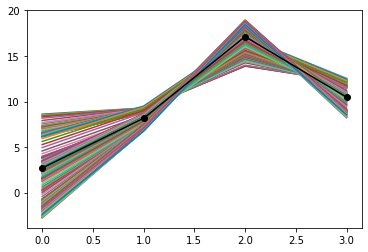

In [73]:
t2m_seasonal_mean
plt.plot(t2m_seasonal_mean.mean(dim=('latitude')))
plt.plot(t2m_seasonal_mean.mean(dim=('latitude', 'longitude')), color='k', marker='o')
plt.show()

### Computing the seasonal anomaly
A climatological anomaly of temperature, often referred to simply as temperature anomaly, is a measure of how the temperature of a specific place and time deviated from some reference temperature (usually the climatological value over the 30-year baseline period).

$Temperature Anomaly = \text{Observed Temperature} - \text{Baseline Temperature}
$

In [74]:
t2m = t2m.sel(latitude=slice(35,70), longitude=slice(-10,35))
# Computing the seasonal temperature anomalies (one value per season)
# We have to aggregate our t2m by season
seasonal_data = t2m.resample(time='QS-DEC').mean()
#'QS-DEC' means the season starts in December'
print(seasonal_data)

<xarray.DataArray 't2m' (time: 331, latitude: 141, longitude: 181)>
array([[[16.537516  , 16.540243  , 16.564209  , ..., 17.590311  ,
         17.676727  , 17.754995  ],
        [16.439798  , 16.447947  , 16.465586  , ..., 17.426077  ,
         17.52064   , 17.562256  ],
        [16.312674  , 16.353394  , 16.377808  , ..., 17.329712  ,
         17.476309  , 17.444174  ],
        ...,
        [-1.8091125 , -1.7177225 , -1.6132101 , ..., -1.4847208 ,
         -1.363027  , -1.2372538 ],
        [-2.07016   , -1.9407552 , -1.857961  , ..., -0.90879315,
         -0.7938741 , -0.7875366 ],
        [-2.3769023 , -2.2493083 , -2.1674194 , ..., -0.7223918 ,
         -0.7246501 , -0.7237447 ]],

       [[20.041534  , 20.056915  , 20.11799   , ..., 25.370626  ,
         25.398224  , 25.325827  ],
        [19.92571   , 19.95466   , 19.987234  , ..., 25.471518  ,
         25.429434  , 25.29777   ],
        [19.754242  , 19.822104  , 19.86146   , ..., 25.577383  ,
         25.6009    , 25.405914  ],

The [DataArray.resample()](https://docs.xarray.dev/en/latest/generated/xarray.DataArray.resample.html) function allows us to (among other functions) to aggregate our data by seasons using the "QS" argument. 'QS-Dec' indicates that the data is resample into quaterly intervals that start in December. Here's what it entails:

1. Quarterly Intervals: Your data will be divided into periods of three months each.

2. Starting in December: The first quarter starts in December. This sets the beginning of your quarters.

For 'QS-DEC', the quarters (or seasons) will be structured as follows:

* Q1: December, January, February
* Q2: March, April, May
* Q3: June, July, August
* Q4: September, October, November

In [75]:
# Computing the anomalies
t2m_seasonal_anomaly = seasonal_data.groupby('time.season') - t2m_seasonal_mean
t2m_seasonal_anomaly

<xarray.DataArray 't2m' (time: 331, latitude: 141, longitude: 181)>
array([[[-0.00291634, -0.02002144, -0.03787613, ..., -0.41574287,
         -0.43567467, -0.4451313 ],
        [-0.01331711, -0.02560616, -0.04157639, ..., -0.49964142,
         -0.48135948, -0.48641968],
        [-0.0376358 , -0.04152679, -0.05241203, ..., -0.6022377 ,
         -0.5640526 , -0.5212822 ],
        ...,
        [-1.3044143 , -1.2794524 , -1.2741418 , ..., -1.8828443 ,
         -1.8358592 , -1.7860327 ],
        [-1.4568031 , -1.392456  , -1.392425  , ..., -1.6409855 ,
         -1.5943664 , -1.5658913 ],
        [-1.6330191 , -1.5695812 , -1.5693082 , ..., -1.5402724 ,
         -1.5160478 , -1.4899573 ]],

       [[-0.6215191 , -0.64162064, -0.66067886, ..., -0.59347725,
         -0.6315155 , -0.67339706],
        [-0.65055466, -0.6648464 , -0.6854286 , ..., -0.6184082 ,
         -0.6278095 , -0.6690197 ],
        [-0.68058014, -0.68545914, -0.70474434, ..., -0.65937424,
         -0.6473522 , -0.6527767 ],
...
        [ 0.28525496,  0.28494215,  0.2950549 , ...,  2.7109165 ,
          2.678422  ,  2.6455317 ],
        [ 0.3581376 ,  0.3650403 ,  0.37117147, ...,  2.579566  ,
          2.5504017 ,  2.5429115 ],
        [ 0.41083717,  0.41755724,  0.4234829 , ...,  2.4892244 ,
          2.4980688 ,  2.502905  ]],

       [[ 0.89375114,  0.8995838 ,  0.908741  , ...,  0.9616127 ,
          0.9437618 ,  0.89866257],
        [ 0.92162323,  0.9309311 ,  0.93808746, ...,  0.9678631 ,
          0.96624374,  0.9336281 ],
        [ 0.9390259 ,  0.9451885 ,  0.94252205, ...,  0.9379177 ,
          0.95199394,  0.9386406 ],
        ...,
        [ 1.3703246 ,  1.3696964 ,  1.3891017 , ...,  1.644017  ,
          1.6234298 ,  1.6021647 ],
        [ 1.4695821 ,  1.4718969 ,  1.5007224 , ...,  1.551189  ,
          1.5330358 ,  1.5404301 ],
        [ 1.5790777 ,  1.5817034 ,  1.6098533 , ...,  1.5165219 ,
          1.5254517 ,  1.5341415 ]]], dtype=float32)
Coordinates:
  * time       (time) datetime64[ns] 1940-03-01 1940-06-01 ... 2022-09-01
  * longitude  (longitude) float32 -10.0 -9.75 -9.5 -9.25 ... 34.5 34.75 35.0
  * latitude   (latitude) float32 35.0 35.25 35.5 35.75 ... 69.5 69.75 70.0
    season     (time) <U3 'MAM' 'JJA' 'SON' 'DJF' ... 'DJF' 'MAM' 'JJA' 'SON'

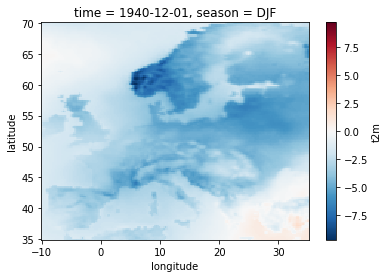

In [78]:
t2m_seasonal_anomaly[3].plot()

#### Practice time 💻
<div style="background-color:lightgreen; padding:10px">
    Compute the European yearly temperature anomalies.
    <ul>
        <li>1. Compute the yearly climatology average value of temperature over the 1991-2020 baseline period</li>
        <li>2. Use the .resample function to aggreate your data by year and compute the mean</li>
        <li>3. Compute the yearly anomalies of the temperature data</li>
        <li>4. Plot a time series of the yearly mean temperature anolies for EU for 1940 to 2022</li>
    </ul>
</div>